# Predict survival on the Titanic

Learning ML with scikit-learn. Goal is to predict if a passenger is going to survide given training data with the following features:

- PassengerId -- A numerical id assigned to each passenger.
- Survived -- Whether the passenger survived (1), or didn't (0). We'll be making predictions for this column.
- Pclass -- The class the passenger was in -- first class (1), second class (2), or third class (3).
- Name -- the name of the passenger.
- Sex -- The gender of the passenger -- male or female.
- Age -- The age of the passenger. Fractional.
- SibSp -- The number of siblings and spouses the passenger had on board.
- Parch -- The number of parents and children the passenger had on board.
- Ticket -- The ticket number of the passenger.
- Fare -- How much the passenger paid for the ticker.
- Cabin -- Which cabin the passenger was in.
- Embarked -- Where the passenger boarded the Titanic.


In [1]:
import pandas as pd
import numpy as np

# Load the training dataset
titanic = pd.read_csv('train.csv', index_col=0)

In [2]:
# Describe the dataset
print titanic.describe()

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## Data Cleaning

### Missing Age
We are missing Age for some records. To assign a value to these missing passengers we'll use the median age.

In [3]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())

In [4]:
print titanic.describe()

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### Encoding Sex Column

We need to encode the categorical feature Sex. Let's assign male = 0 and female = 1

In [5]:
# Male
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0

# Female
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

### Encoding the Embarked Column

The port where the passenger boarded the Titanic.

In [6]:
print(titanic["Embarked"].unique())

['S' 'C' 'Q' nan]


### Fixing nan on Fare

In [7]:
titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

In [8]:
## TODO: Print the distribution of Port of Embarked. 

In [9]:
# Fill the missing values with the most common port of origin
titanic["Embarked"] = titanic["Embarked"].fillna('S')

### We'll assign S = 0, C = 1, Q = 2, 
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

# Creating the Model

In [10]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

## Data Exploration

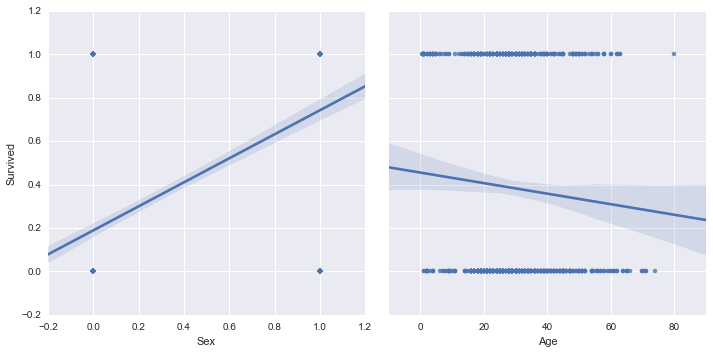

In [11]:
# visualize the relationship between the age, sex and survival using scatterplots
sns.pairplot(titanic, x_vars=['Sex','Age'], y_vars='Survived', size=5, aspect=1, kind='reg')

In [12]:
# Get our dataset for Model
X = titanic.drop(['Survived'], axis=1)
y = titanic["Survived"]

print X.shape
print y.shape

print type(X)
print type(y)

(891, 10)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Logistic Regression with 10-Fold Cross-Validation

In [15]:
# Import the linear regression class
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# The columns we'll use to predict survival
feature_cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = titanic[feature_cols]

# 10-fold cross-validation with all three features
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

logreg.fit(X,y)

print "Predicted out of sample accuracy is: %s" % (scores.mean())

Predicted out of sample accuracy is: 0.79354102826


## Random Forest with 10-Fold Cross-Validation

In [70]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)
scores = cross_val_score(random_forest, X, y, cv=10, scoring='accuracy')

random_forest.fit(X,y)

print "Predicted out of sample accuracy is: %s" % (scores.mean())

Predicted out of sample accuracy is: 0.832817500851


# Feature Engineering

### Family size & Name Length

In [18]:
# Creating a new feature with family size (numer of siblings + parents)
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

# Name lenght as as indicator of how rich the person is
titanic["NameLength"] = titanic["Name"].apply( lambda x: len(x))

### Title

In [21]:
# Using the name of the title
# A function to get the title from a name.
import re
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
dtype: int64


In [23]:
# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pd.value_counts(titles))

# Add in the title column.
titanic["Title"] = titles

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
dtype: int64


### Family Groups

In [26]:
import operator

# A dictionary mapping family name to id
family_id_mapping = {}

# A function to get the id given a row
def get_family_id(row):
    # Find the last name by splitting on a comma
    last_name = row["Name"].split(",")[0]
    # Create the family id
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    # Look up the id in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the maximum id from the mapping and add one to it if we don't have an id
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

# Get the family ids with the apply method
family_ids = titanic.apply(get_family_id, axis=1)

# There are a lot of family ids, so we'll compress all of the families under 3 members into one code.
family_ids[titanic["FamilySize"] < 3] = -1

# Print the count of each unique id.
print(pd.value_counts(family_ids))

titanic["FamilyId"] = family_ids

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


## Finding the best features

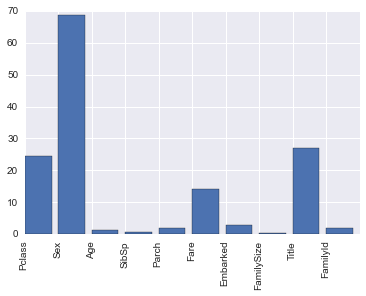

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

features_col = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[features_col], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(features_col)), scores)
plt.xticks(range(len(features_col)), features_col, rotation='vertical')
plt.show()


# Improving Benchmark Models

In [89]:
# Pick only the four best features.
features_col = ["Pclass", "Sex", "Fare", "Title"]

# Get our dataset for Model
X = titanic[features_col]
y = titanic["Survived"]

print X.shape
print y.shape

print type(X)
print type(y)

(891, 4)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [115]:
# Random Forest
random_forest = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
scores = cross_val_score(random_forest, X, y, cv=10, scoring='accuracy')

random_forest.fit(X,y)

print "Predicted out of sample accuracy is: %s" % (scores.mean())

Predicted out of sample accuracy is: 0.835090228124


## Creating an Ensamble

In [149]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
scores = cross_val_score(clf, X, y)
print scores.mean()


# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4), ["Pclass", "Sex", "Fare", "Title"]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "Title"]]
]

# Initialize the cross validation folds
kf = KFold(titanic.shape[0], n_folds=10, random_state=1)

predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)


print accuracy

0.814814814815
0.817059483726


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


## Making predictions on the test data

In [96]:
X_test = pd.read_csv("test.csv")

# Data Transformations
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].median())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].median())
X_test.loc[X_test["Sex"] == "male", "Sex"] = 0 
X_test.loc[X_test["Sex"] == "female", "Sex"] = 1
X_test["Embarked"] = X_test["Embarked"].fillna("S")

X_test.loc[X_test["Embarked"] == "S", "Embarked"] = 0
X_test.loc[X_test["Embarked"] == "C", "Embarked"] = 1
X_test.loc[X_test["Embarked"] == "Q", "Embarked"] = 2


# First, we'll add titles to the test set.
titles = X_test["Name"].apply(get_title)

# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}

for k,v in title_mapping.items():
    titles[titles == k] = v

X_test["Title"] = titles

# Now, we add the family size column.
X_test["FamilySize"] = X_test["SibSp"] + X_test["Parch"]

family_ids = X_test.apply(get_family_id, axis=1)
family_ids[X_test["FamilySize"] < 3] = -1
X_test["FamilyId"] = family_ids
X_test["NameLength"] = X_test["Name"].apply(lambda x: len(x))


In [97]:
# Applying the model to the test data
predictions = random_forest.predict(X_test[features_col])

submission = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived": predictions
    })

In [117]:
# Write the results to a file
pd.DataFrame.to_csv(submission,'predictions.csv', index=False)